# Exercise 11: Clustering project

*Authors : Bastian Christian Reese Dam,  Caroline Kamuk Ostenfeldt , Christine Line Larsen* 

# Introduction 

The group made the choice of working with the spiral dataset, based on interesting density on the inner- and outer points, and the size of the spiral would affect the effectivity of the algorithms. 

Spiral Data Information: 
* N=312,  k=3,  D=2

*spiral.txt* is used.

The ChainLink3D dataset was chosen to experiment and investigate the algorithms performance on 3. dim. datasets, and was additionally chosen to examine the specific effects of given clustering mechanisms such as EM clustering on nearby-dense clusters.  

We have used the five different clustering algorithms: 
*  K-means 
*  EM Clustering / (GM)   
*  DBSCAN  
*  SNN Clustering 
*  Single Link 

This is to show different performances of algorithms in contrast and comparison on the datasets. These algorithms are also the most widely used, and therefore we knew which kinds of results to expect. 

To be able to explore the code and results with more insight, we have chosen to work in python with different sklearn implementations, and steered away from Elki, as it can be considered as a black-box environment. 

# Clustering algorithms 

Common to clustering algorithms is the minimization of the variance, based on cohesion and separation of clusters. 

Clustering is based on grouping sets of objects in a way they are more "similar" to each other, compared to those in other groups. Finding a relationship between objects, can be uncovered by organizing information into the clusters; hightlighting  recurring patterns and underlying rules. 

As for methods to use algorithms to uncovering clusters. These can be categorized via their measures of similarity: **centroid, distribution and connectivity** based methods. 

*  Distribution-Based Methods: Expectation maximization (EM), Gaussian mixture models, Gaussian Mixture Models (GMM)
*  Centroid-Based Methods: K-means, cluster units
*  Connectivity-Based Methods: hierarchical clustering, density-based clustering like OPTICS and DBSCAN

## k-Means:

The basic operation of K-Means clustering algorithms is relatively simple: Given a fixed number of k clusters, assign observations to those clusters so that the means across clusters (for all variables) are as different from each other as possible.

"K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the total distances to centroids from each point as small as possible."

The disadvantage of this approach is the clusters needs to be convex of more or less equal extension. 

The number of k-clusters can be hard to determine, but that is where elbow-method can be applied. 

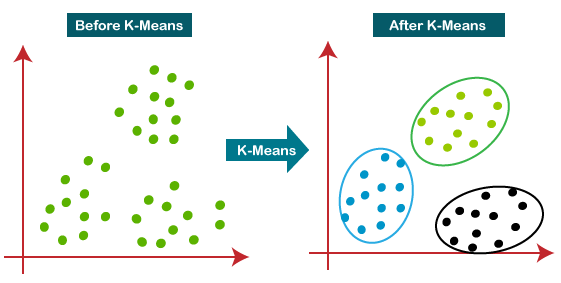

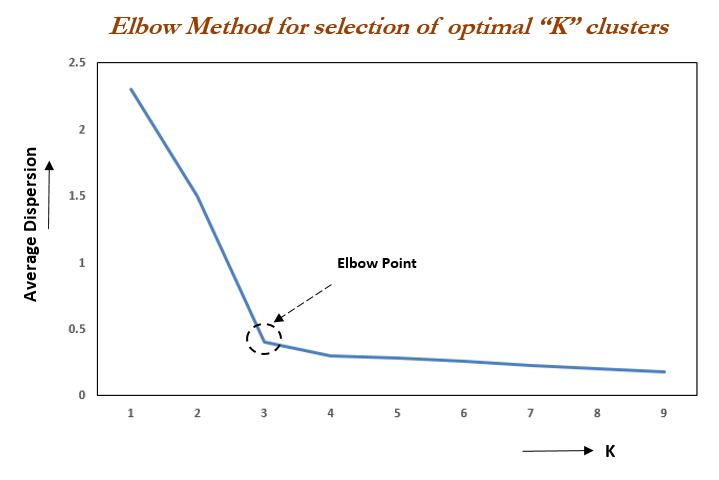

Alternatively the silhouette score can be used to determine the number of clusters.  

## EM-clustering

Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

Expectation-Maximization (EM) is a statistical algorithm for finding the right model parameters. 

The EM (expectation maximization) technique is similar to the K-Means technique, except this is a probabilistic approach that calculates the probability of a given point belonging to a specific centroid. 

k-means only considers the mean to update the centroid while GMM takes into account the mean as well as the variance of the data!

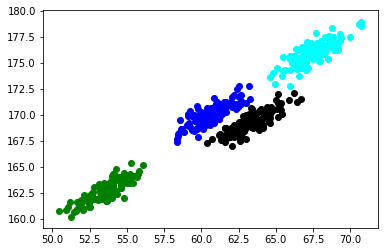

## DBSCAN

"Density-Based Spatial Clustering of Applications with Noise", It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.



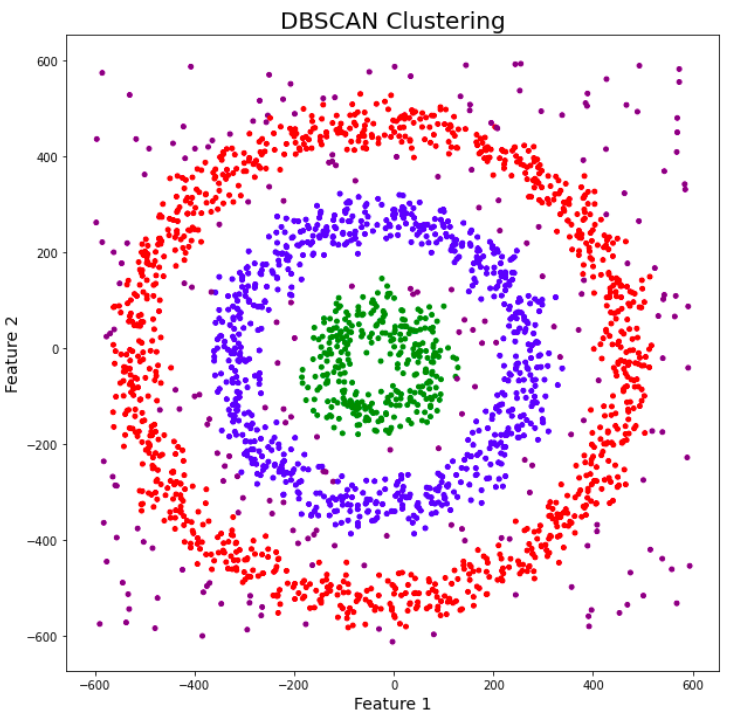

Reachability states if a data point can be accessed from another data point directly or indirectly, whereas Connectivity states whether two data points belong to the same cluster or not. In terms of reachability and connectivity, two points in DBSCAN can be referred to as:

*  Directly Density-Reachable
*  Density-Reachable
*  Density-Connected

The following illustration shows: 

*  A point X is density-reachable from point Y w.r.t epsilon, minPoints if there is a chain of points p1, p2, p3, …, pn and p1=X and pn=Y such that pi+1 is directly density-reachable from pi.
    * Here, X is density-reachable from Y with X being directly density-reachable from P2, P2 from P3, and P3 from Y. But, the inverse of this is not valid.

*  Here, X is density-reachable from Y with X being directly density-reachable from P2, P2 from P3, and P3 from Y.
*  If two points are density-reachable from a given point, then the two points are density-connected. 


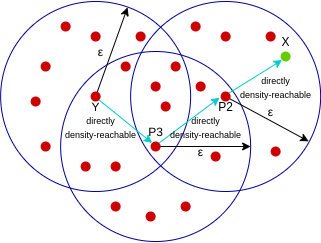

##### Parameters

Choosing good parameters is important to achieve good results, and we must understand how they are used, and have basic knowledge about the data in use. 

*  eps: specify the maximum distance between points to be a part of the same cluster. If the distance between these two points are lower or equal to epsilon, these points are directly-density reachable / neighbors.  
    * if the value is too small, there will be too many outliers and not be clusters, and if the value is too high, the clusters will merge, and most points will be in the same cluster
    * the epsilon should be chosen based on the distance of the dataset (we can use a k-distance graph to find it), but in general small epsilon values are preferable.
*  minPoints: minimum number of points within epsilon distance to make the point a core point 
    * minPoints ≥ D + 1

*(Since we can visually determine the performance of the algorithm with different chosen epsilon values)*

## Single-Link

Given the data and density of it, connectivity-based clustering (hierachical clustering), we know the core idea is objects being more related to other objects nearby, rather than objects father away. The maximum distance needed to connect parts of the cluster, can be broadly describe a cluster. 

Based on how the distances are computed, connectivity-based clustering stands out. We as users also need to decide on the linkage criterion to use - a popular choice here is the single-linkage clustering (minimum of object distances), complete linkage clustering (the maximum of object distances) and UPGMA or WPGMA. 

The methods will not produce a unique partitioning of the data set, but the user will need to choose appropriate clusters from a hierarchy. Having a not so robust work with outliers, these will show up as additional clusters, or cause the "chaining phenomenon"; causing the clusters to merge.

## SNN

Shared Nearest Neighbor (SNN) is a solution to clustering high-dimensional data with the ability to find clusters of varying density. SNN assigns objects to a cluster, which share a large number of their nearest neighbors.

SNN Clustering algorithm is a combination of

*  Jarvis-Patrick algorithm and
*  DBSCAN with SSN Similarity and SSN Density

With the parameters of: 
*  k 
    *  k controls granularity of clusters
    *  if k is small, then it will find small and very tight clusters
    *  if k is large, it'll find big and well-separated clusters
*  ϵ 
*  min_points < k

****

## The data:
Spiral dataset in 2 dimensions with 3 clusters:

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

df = pd.read_csv("spiral.csv", delimiter = ';', header = None) 
df2 = df[[0,1]]

plt.scatter(df[0], df[1], c = df[2])

FileNotFoundError: [Errno 2] No such file or directory: 'spiral.csv'

In [5]:
df = pd.read_csv("spiral.csv", delimiter = ';', header = None) 
df2 = df[[0,1]]

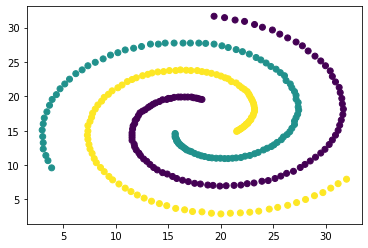

In [4]:
plt.scatter(df[0], df[1], c = df[2])

In [6]:
# Applying the algorithms:
kmeans = KMeans(n_clusters=3).fit(df2)
kmeans_centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_.astype(float)
kmeans_silhouette = silhouette_score(df2, kmeans_labels)

gm = GaussianMixture(n_components=3)
gm.fit(df2)
gm_labels = gm.predict(df2)
gm_silhouette = silhouette_score(df2, gm_labels)

dbscan = DBSCAN(eps = 3, min_samples= 2).fit(df2)
dbscan_labels = dbscan.labels_
dbscan_silhouette = silhouette_score(df2, dbscan_labels)

knn_graph = kneighbors_graph(df2, 5, include_self=False)
sl = AgglomerativeClustering(linkage= 'single', connectivity = knn_graph, n_clusters=3)
sl.fit(df2)
sl_labels = sl.labels_
sl_silhouette = silhouette_score(df2, sl_labels)


NameError: name 'df2' is not defined

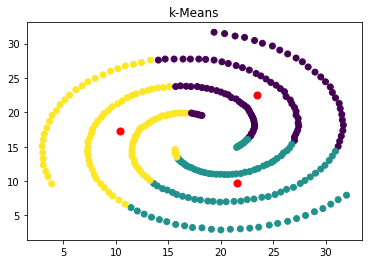

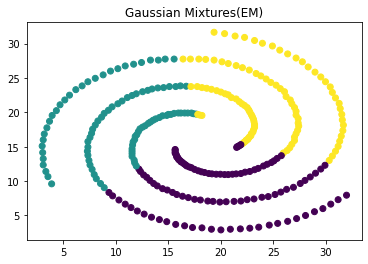

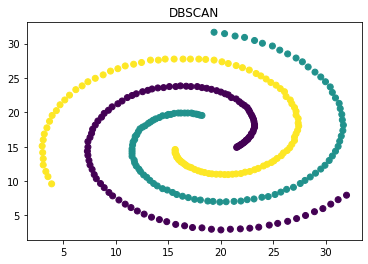

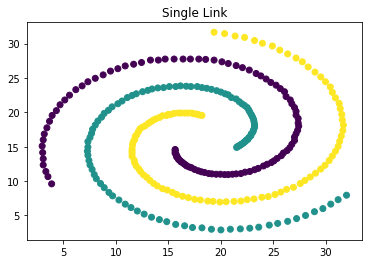

silhouette scores:
kmeans:  0.36029128398191296 
GM:  0.3641840066758602 
DBSCAN:  0.0013442973442779936 
Single Link:  0.0013442973442779936


In [34]:
# Plotting the data:
plt.scatter(df2[0], df2[1], c= kmeans_labels)
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', s=50)
plt.title("k-Means")
plt.show()

plt.scatter(df2[0], df2[1], c= gm_labels)
plt.title('Gaussian Mixtures(EM)')
plt.show()
          
plt.scatter(df2[0], df2[1], c= dbscan_labels)
plt.title('DBSCAN')
plt.show()    

plt.scatter(df2[0], df2[1], c= sl_labels)
plt.title('Single Link')
plt.show()
          
print('silhouette scores:\nkmeans: ', kmeans_silhouette, '\nGM: ', gm_silhouette, '\nDBSCAN: ', dbscan_silhouette, '\nSingle Link: ', sl_silhouette)

# What happens if we add some "noise"?

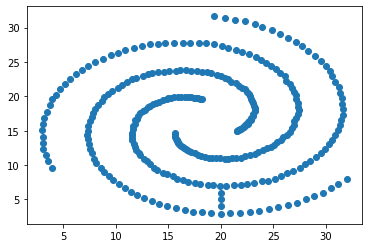

In [35]:
df_noise = pd.read_csv("spiral_noise.csv", delimiter = ';', header = None) 
plt.scatter(df_noise[0], df_noise[1])

In [2]:
# Applying the algorithms:
kmeans = KMeans(n_clusters=3).fit(df_noise)
kmeans_centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_.astype(float)
kmeans_silhouette = silhouette_score(df_noise, kmeans_labels)

gm = GaussianMixture(n_components=3)
gm.fit(df_noise)
gm_labels = gm.predict(df_noise)
gm_silhouette = silhouette_score(df_noise, gm_labels)

dbscan = DBSCAN(eps = 3, min_samples= 2).fit(df_noise)
dbscan_labels = dbscan.labels_
dbscan_silhouette = silhouette_score(df_noise, dbscan_labels)

knn_graph = kneighbors_graph(df_noise, 5, include_self=False)
sl = AgglomerativeClustering(linkage= 'single', connectivity = knn_graph, n_clusters=3)
sl.fit(df_noise)
sl_labels = sl.labels_
sl_silhouette = silhouette_score(df_noise, sl_labels)


NameError: name 'KMeans' is not defined

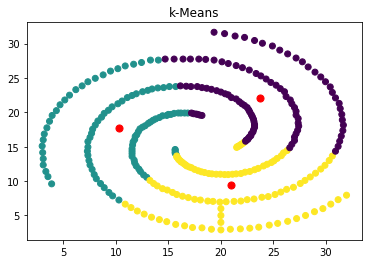

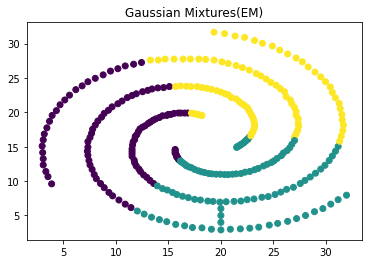

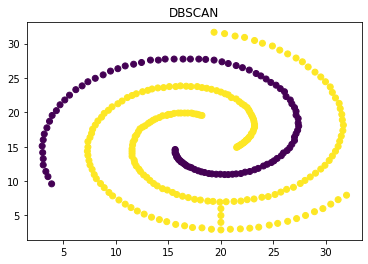

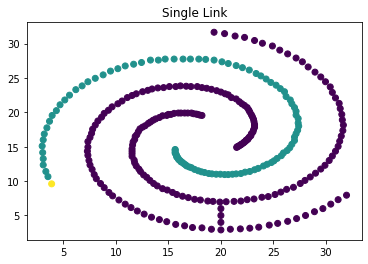

silhouette scores:
kmeans:  0.36393128649480977 
GM:  0.3626984486105561 
DBSCAN:  0.021944234811668212 
Single Link:  -0.06707640931479468


In [38]:
# Plotting the data:
plt.scatter(df_noise[0], df_noise[1], c= kmeans_labels)
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', s=50)
plt.title("k-Means")
plt.show()

plt.scatter(df_noise[0], df_noise[1], c= gm_labels)
plt.title('Gaussian Mixtures(EM)')
plt.show()
          
plt.scatter(df_noise[0], df_noise[1], c= dbscan_labels)
plt.title('DBSCAN')
plt.show()    

plt.scatter(df_noise[0], df_noise[1], c= sl_labels)
plt.title('Single Link')
plt.show()
          
print('silhouette scores:\nkmeans: ', kmeans_silhouette, '\nGM: ', gm_silhouette, '\nDBSCAN: ', dbscan_silhouette, '\nSingle Link: ', sl_silhouette)

# What if we add a dimension?

In [3]:
CL = pd.read_csv("ChainLink3D_2.csv", delimiter = ',', header = None) 
CL2 = CL[[0,1,2]]
X = CL2
plt.figure('ChainLink3D', figsize=(7,5))
ax = plt.axes(projection = '3d')
ax.scatter(X[0],X[1],X[2])

NameError: name 'pd' is not defined

In [4]:
# Applying the algorithms:
kmeans = KMeans(n_clusters=3).fit(X)
kmeans_centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_.astype(float)
kmeans_silhouette = silhouette_score(X, kmeans_labels)

gm = GaussianMixture(n_components=3)
gm.fit(X)
gm_labels = gm.predict(X)
gm_silhouette = silhouette_score(X, gm_labels)

dbscan = DBSCAN(eps = 3, min_samples= 2).fit(X)
dbscan_labels = dbscan.labels_
#dbscan_silhouette = silhouette_score(X, dbscan_labels)

knn_graph = kneighbors_graph(X, 30, include_self=False)
sl = AgglomerativeClustering(linkage= 'single', connectivity = knn_graph, n_clusters=3)
sl.fit(X)
sl_labels = sl.labels_
sl_silhouette = silhouette_score(X, sl_labels)


NameError: name 'KMeans' is not defined

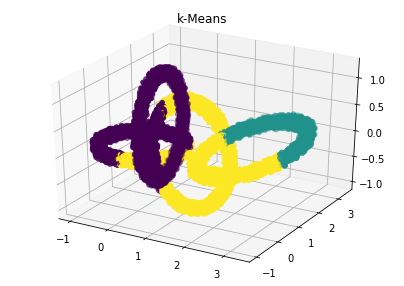

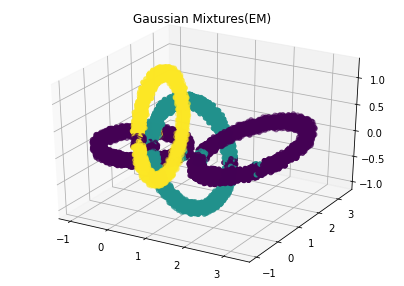

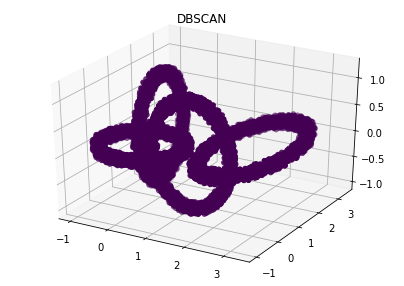

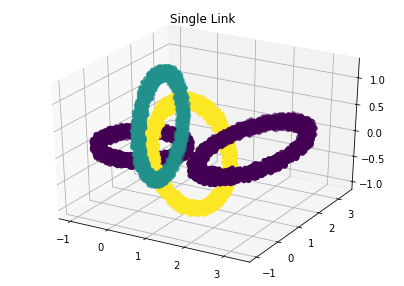

silhouette scores:
kmeans:  0.3984259540615282 
GM:  0.08059032477735659 
DBSCAN: NA 
Single Link:  0.07209967735787898


In [52]:
# Plotting the data:
plt.figure('ChainLink3D', figsize=(7,5))
ax = plt.axes(projection = '3d')
ax.scatter(X[0],X[1],X[2], c = kmeans_labels)
plt.title("k-Means")
plt.show() 

# Plotting the data:
plt.figure('ChainLink3D', figsize=(7,5))
ax = plt.axes(projection = '3d')
ax.scatter(X[0],X[1],X[2], c = gm_labels)
plt.title('Gaussian Mixtures(EM)')
plt.show() 

# Plotting the data:
plt.figure('ChainLink3D', figsize=(7,5))
ax = plt.axes(projection = '3d')
ax.scatter(X[0],X[1],X[2], c = dbscan_labels)
plt.title("DBSCAN")
plt.show() 

# Plotting the data:
plt.figure('ChainLink3D', figsize=(7,5))
ax = plt.axes(projection = '3d')
ax.scatter(X[0],X[1],X[2], c = sl_labels)
plt.title("Single Link")
plt.show() 

          
print('silhouette scores:\nkmeans: ', kmeans_silhouette, '\nGM: ', gm_silhouette, '\nDBSCAN: NA', '\nSingle Link: ', sl_silhouette)

In [8]:
distn = pdist(CL2)
centr = centroid(distn)

fcluster(centr, 3,criterion = 'distance')

from mpl_toolkits import mplot3d
distn = pdist(CL2)
centr = centroid(distn)

X = CL2
#y = model.labels_
plt.figure('ChainLink3D', figsize=(7,5))
ax = plt.axes(projection = '3d')
ax.scatter(CL2[0],CL2[1],CL2[2],c= model.labels_);

NameError: name 'pdist' is not defined

In [ ]:
%matplotlib widget

# Evaluation of density based clusters:
How do you validate clustering assignmnets from unsupervised learning algorithms? A common method is the Silhoette Method, which provides an objective score between -1 and 1 on the quality of clustering. The silhouette value measures how well an object is classified in its own cluster instead of neighboring clusters. The silhouette (and most other popular methods) work very well on globular clusters, but can fail on non-glubular clusters such as our spiral/ring data.

Another possible way to evaluate the preformance is DBCV which can validate clustering assignments on non-globular, arbitrarily shaped clusters (such as the example above). In essence, DBCV computes two values:

- The density within a cluster
- The density between clusters

High density within a cluster, and low density between clusters indicates good clustering assignments.

### Clustered with SNN in R

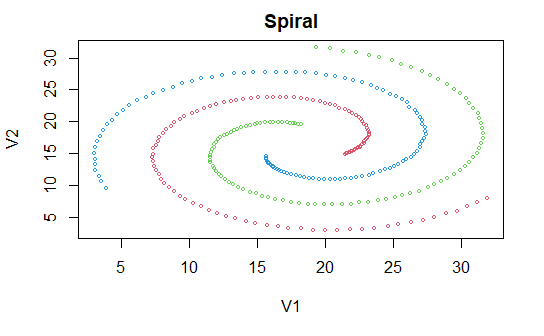

*  k = 5
*  epsilon = 1 
*  min_points = 4

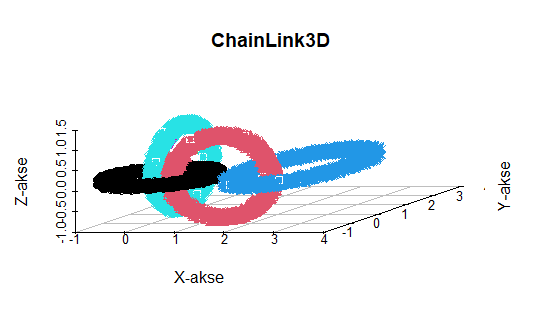

*  k = 8
*  epsilon = 1
*  min_points = 3

### With noise 

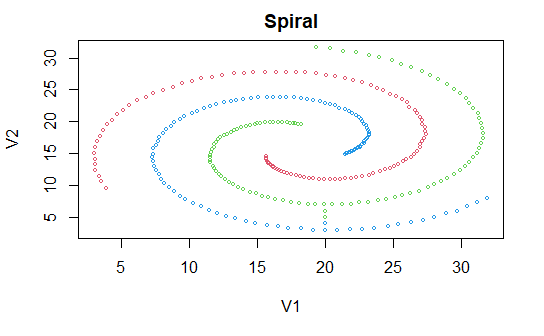